Doge coin CryptoCurrency analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [13]:
#load the data set
from google.colab import files
files.upload()

Saving Litecoin Historical Data.csv to Litecoin Historical Data.csv
Saving Ethereum Historical Data.csv to Ethereum Historical Data.csv
Saving Bitcoin Historical Data.csv to Bitcoin Historical Data.csv


{'Bitcoin Historical Data.csv': b'\xef\xbb\xbf"Date","Price","Open","High","Low","Vol.","Change %"\r\n"Mar 08, 2021","51,026.5","50,988.9","51,801.1","49,338.1","95.38K","0.09%"\r\n"Mar 07, 2021","50,982.3","48,899.0","51,434.1","48,890.6","82.91K","4.35%"\r\n"Mar 06, 2021","48,855.6","48,798.7","49,191.8","47,132.8","66.66K","0.13%"\r\n"Mar 05, 2021","48,792.5","48,363.6","49,429.4","46,370.1","113.64K","0.75%"\r\n"Mar 04, 2021","48,428.0","50,388.0","51,757.7","47,521.8","9.56K","-3.90%"\r\n"Mar 03, 2021","50,395.1","48,422.2","52,567.9","48,159.2","44.93K","4.07%"\r\n"Mar 02, 2021","48,424.2","49,595.6","50,191.9","47,100.6","102.10K","-2.36%"\r\n"Mar 01, 2021","49,595.5","45,160.5","49,774.0","45,008.8","137.52K","9.81%"\r\n"Feb 28, 2021","45,164.0","46,136.0","46,582.0","43,100.6","135.08K","-2.11%"\r\n"Feb 27, 2021","46,136.7","46,333.1","48,335.1","45,059.4","98.75K","-0.45%"\r\n"Feb 26, 2021","46,345.6","46,928.5","48,413.9","44,248.2","189.41K","-1.24%"\r\n"Feb 25, 2021","46,9

In [53]:
#preparing dateset
Doge = pd.read_csv("Dogecoin Historical Data.csv")
BTC = pd.read_csv("Bitcoin Historical Data.csv")
ETH = pd.read_csv("Ethereum Historical Data.csv")
LTC = pd.read_csv("Litecoin Historical Data.csv")

print(Doge.head(5))
print(LTC.head(5))

Doge.rename(columns={"Price":"DOGE"},inplace=True)
BTC.rename(columns={"Price":"BTC"},inplace=True)
ETH.rename(columns={"Price":"ETH"},inplace=True)
LTC.rename(columns={"Price":"LTC"},inplace=True)

#making list to apply reduce
dfs = [Doge[["Date","DOGE"]],ETH[["Date","ETH"]],LTC[["Date","LTC"]],BTC[["Date","BTC"]]]

from functools import reduce

#merging the data on "Date"
df= reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs)


           Date     Price      Open      High       Low    Vol. Change %
0  Mar 08, 2021  0.056044  0.051888  0.059635  0.051622  11.00B    8.03%
1  Mar 07, 2021  0.051881  0.050924  0.052248  0.050548   3.03B    1.86%
2  Mar 06, 2021  0.050935  0.049523  0.052453  0.049256   5.28B    2.73%
3  Mar 05, 2021  0.049584  0.049925  0.050877  0.048026   3.76B   -0.69%
4  Mar 04, 2021  0.049927  0.050469  0.051118  0.047762   3.65B   -1.08%
           Date    Price     Open     High      Low     Vol. Change %
0  Mar 08, 2021  186.520  190.763  195.221  179.612  148.32M   -2.22%
1  Mar 07, 2021  190.759  182.839  192.096  182.233  146.54M    4.34%
2  Mar 06, 2021  182.816  180.142  184.542  174.774  146.26M    1.48%
3  Mar 05, 2021  180.142  180.669  183.540  168.671  153.39M   -0.29%
4  Mar 04, 2021  180.657  187.684  194.404  177.061  173.56M   -3.81%


In [48]:
df.head()

,Date,DOGE,ETH,LTC,BTC
0,"Mar 08, 2021",0.056044,"1,746.16",186.520,"51,026.5"
1,"Mar 07, 2021",0.051881,"1,728.10",190.759,"50,982.3"
2,"Mar 06, 2021",0.050935,"1,649.19",182.816,"48,855.6"
3,"Mar 05, 2021",0.049584,"1,530.29",180.142,"48,792.5"
4,"Mar 04, 2021",0.049927,"1,538.61",180.657,"48,428.0"


In [54]:
#set the date as index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

#sorting according to the date
print(df.head())
df.sort_index(ascending=True,inplace=True)
print(df.head())

#now we can drop the date column

df = df.drop(['Date'],axis=1)

print(df.head())

                    Date      DOGE       ETH      LTC       BTC
2021-03-08  Mar 08, 2021  0.056044  1,746.16  186.520  51,026.5
2021-03-07  Mar 07, 2021  0.051881  1,728.10  190.759  50,982.3
2021-03-06  Mar 06, 2021  0.050935  1,649.19  182.816  48,855.6
2021-03-05  Mar 05, 2021  0.049584  1,530.29  180.142  48,792.5
2021-03-04  Mar 04, 2021  0.049927  1,538.61  180.657  48,428.0
                    Date      DOGE     ETH    LTC      BTC
2017-06-03  Jun 03, 2017  0.003213  217.01  27.40  2,545.4
2017-06-04  Jun 04, 2017  0.003770  241.06  27.79  2,524.1
2017-06-05  Jun 05, 2017  0.003718  242.16  30.70  2,705.0
2017-06-06  Jun 06, 2017  0.003617  261.89  30.10  2,870.5
2017-06-07  Jun 07, 2017  0.003250  250.70  28.60  2,691.5
                DOGE     ETH    LTC      BTC
2017-06-03  0.003213  217.01  27.40  2,545.4
2017-06-04  0.003770  241.06  27.79  2,524.1
2017-06-05  0.003718  242.16  30.70  2,705.0
2017-06-06  0.003617  261.89  30.10  2,870.5
2017-06-07  0.003250  250.70  28.60  

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1375 entries, 2017-06-03 to 2021-03-08
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DOGE    1375 non-null   float64
 1   ETH     1375 non-null   object 
 2   LTC     1375 non-null   float64
 3   BTC     1375 non-null   object 
dtypes: float64(2), object(2)
memory usage: 53.7+ KB


In [92]:
#convert the non-number value to numbers
df["BTC"] = df["BTC"].map(lambda item:float(item.replace(",","")))
df["ETH"] = df["ETH"].map(lambda item:float(item.replace(",","")))


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1375 entries, 2017-06-03 to 2021-03-08
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DOGE    1375 non-null   float64
 1   ETH     1375 non-null   float64
 2   LTC     1375 non-null   float64
 3   BTC     1375 non-null   float64
dtypes: float64(4)
memory usage: 53.7 KB


In [94]:
#now all columns are nummeric

#now get some statistics on columns

df.describe()

,DOGE,ETH,LTC,BTC
count,1375.000000,1375.000000,1375.000000,1375.000000
mean,0.004747,381.656662,81.682773,9850.603055
std,0.009628,328.330078,53.460284,8255.488283
min,0.000774,83.810000,23.124000,1914.100000
25%,0.002282,182.570000,46.572500,6178.150000
50%,0.002688,264.590000,59.606000,8148.100000
75%,0.003464,443.260000,95.172500,10336.450000
max,0.148228,1955.590000,359.400000,57433.800000


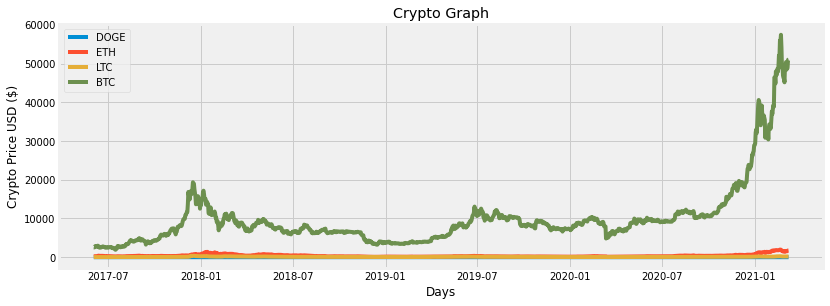

In [95]:
#visulaize and graph the cryptocurrenices price

my_crypto = df

plt.figure(figsize=(12.2,4.5))

for c in my_crypto.columns.values:
  plt.plot(my_crypto[c],label = c)

plt.title("Crypto Graph")
plt.xlabel("Time")
plt.ylabel("Crypto Price USD ($)")
plt.legend(my_crypto.columns.values, loc='upper left')
plt.show()

In [109]:
#Scale the data

from sklearn.preprocessing import MinMaxScaler

scaler = preprocessing.MinMaxScaler(feature_range =(0,100))
scaled = scaler.fit_transform(df)
scaled

array([[ 1.65407517,  7.11622092,  1.27157454,  1.13707387],
       [ 2.03182009,  8.40109415,  1.3875507 ,  1.09870911],
       [ 1.99655486,  8.45986174,  2.2529113 ,  1.4245394 ],
       ...,
       [34.01806665, 83.63055487, 47.48837265, 84.5492681 ],
       [34.65962266, 87.84632809, 49.85042049, 88.37980032],
       [37.48287602, 88.81118508, 48.58984881, 88.4594117 ]])

In [110]:
#convert the scaled data into the data frame
df_scale = pd.DataFrame(scaled,columns=df.columns)
#set the date as the index
df_scale = df_scale.set_index(pd.DatetimeIndex(df.index))
#show the scaled data
df_scale

,DOGE,ETH,LTC,BTC
2017-06-03,1.654075,7.116221,1.271575,1.137074
2017-06-04,2.031820,8.401094,1.387551,1.098709
2017-06-05,1.996555,8.459862,2.252911,1.424539
2017-06-06,1.928059,9.513939,2.074486,1.722632
2017-06-07,1.679168,8.916112,1.628424,1.400224
...,...,...,...,...
2021-03-04,33.334464,77.722809,46.846341,83.779091
2021-03-05,33.101849,77.278313,46.693192,84.435615
2021-03-06,34.018067,83.630555,47.488373,84.549268
2021-03-07,34.659623,87.846328,49.850420,88.379800


In [113]:
df_scale.describe()

,DOGE,ETH,LTC,BTC
count,1375.000000,1375.000000,1375.000000,1375.000000
mean,2.694248,15.912482,17.413902,14.294931
std,6.529191,17.541061,15.897740,14.869476
min,0.000000,0.000000,0.000000,0.000000
25%,1.022353,5.276261,6.972992,7.680247
50%,1.298032,9.658186,10.848827,11.228447
75%,1.824298,19.203646,21.425407,15.170021
max,100.000000,100.000000,100.000000,100.000000


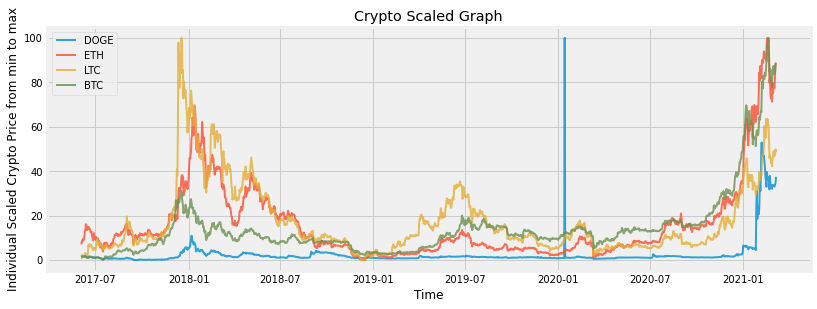

In [133]:
#visulaize and graph the scaled cryptocurrenices price

my_crypto = df_scale

plt.figure(figsize=(12.2,4.5))

for c in my_crypto.columns.values:
  plt.plot(my_crypto[c],label = c,alpha = 0.8,lw =2)

plt.title("Crypto Scaled Graph")
plt.xlabel("Time")
plt.ylabel("Individual Scaled Crypto Price from min to max")
plt.legend(my_crypto.columns.values, loc='upper left')
plt.show()

In [135]:
#show how price changes for every 4 months
FMR = df.pct_change(120)
#show the data
FMR

,DOGE,ETH,LTC,BTC
2017-06-03,NaN,NaN,NaN,NaN
2017-06-04,NaN,NaN,NaN,NaN
2017-06-05,NaN,NaN,NaN,NaN
2017-06-06,NaN,NaN,NaN,NaN
2017-06-07,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-03-04,18.609976,2.825580,2.308554,2.423538
2021-03-05,17.788935,2.673019,2.055274,2.130313
2021-03-06,17.474791,2.618867,1.895866,2.136212
2021-03-07,18.431086,2.968994,2.241114,2.438152


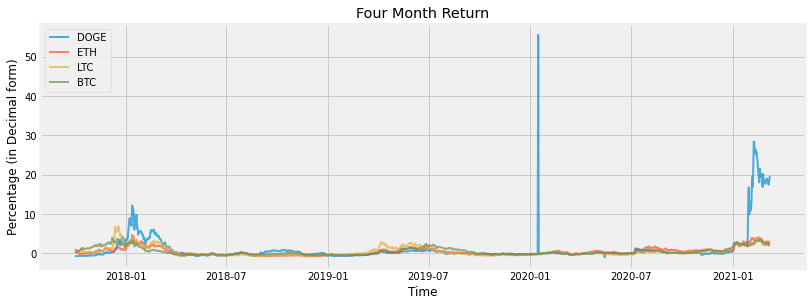

In [136]:
#show the four month return 
my_crypto = FMR

plt.figure(figsize=(12.2,4.5))

for c in my_crypto.columns.values:
  plt.plot(my_crypto[c],label = c,alpha=0.7,lw=2)

plt.title("Four Month Return")
plt.xlabel("Time")
plt.ylabel("Percentage (in Decimal form)")
plt.legend(my_crypto.columns.values, loc='upper left')
plt.show()

In [139]:
#crypto currencies voltality
print("The Cryptocurrency volatility:")
print(FMR.std())
print("More Volatility --> More Risk")

The Cryptocurrency volatility:
DOGE    4.009141
ETH     0.974835
LTC     1.156430
BTC     0.943479
dtype: float64
More Volatility --> More Risk


In [143]:
# Average daily return for each crypto
DSR = df.pct_change(1)
print("Percentage Daily Return")
print(DSR.mean())

Percentage Daily Return
DOGE    0.050507
ETH     0.003051
LTC     0.003227
BTC     0.003136
dtype: float64


In [145]:
#Get the correlation among different Crypto Coins
DSR.corr()

,DOGE,ETH,LTC,BTC
DOGE,1.000000,0.021267,0.016897,0.021620
ETH,0.021267,1.000000,0.735580,0.731906
LTC,0.016897,0.735580,1.000000,0.678807
BTC,0.021620,0.731906,0.678807,1.000000


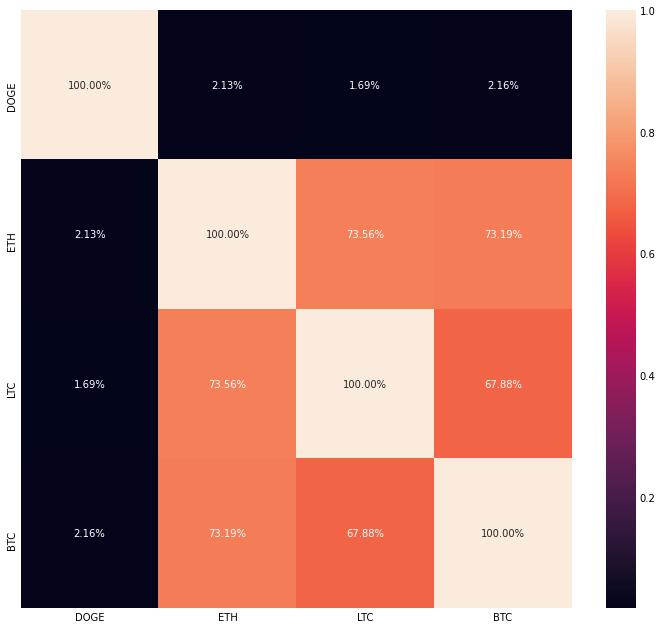

In [146]:
#using heat map to visualize the correlation
import seaborn  as sns
plt.subplots(figsize = (11,11))
sns.heatmap(DSR.corr(),annot=True,fmt='.2%')

In [155]:
# show the daily cummulative simple returns
DCSR = (DSR+1).cumprod()*100
DCSR

,DOGE,ETH,LTC,BTC
2017-06-03,NaN,NaN,NaN,NaN
2017-06-04,117.335823,111.082439,101.423358,99.163196
2017-06-05,115.717398,111.589328,112.043796,106.270134
2017-06-06,112.573918,120.681075,109.854015,112.772059
2017-06-07,101.151572,115.524630,104.379562,105.739766
...,...,...,...,...
2021-03-04,1553.906007,709.004193,659.332117,1902.569341
2021-03-05,1543.230626,705.170269,657.452555,1916.889290
2021-03-06,1585.278556,759.960370,667.211679,1919.368272
2021-03-07,1614.721444,796.322750,696.200730,2002.918991


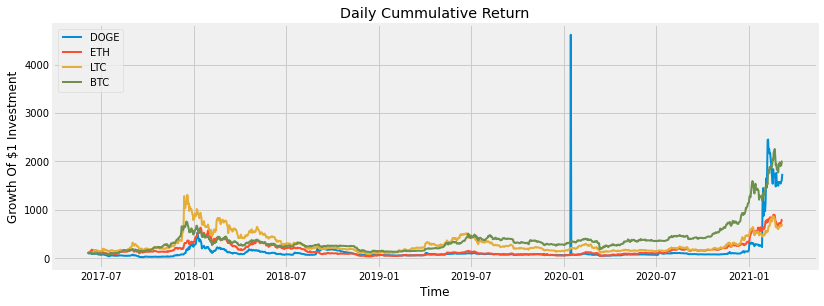

In [156]:
#show the daily cummulative return

my_crypto = DCSR

plt.figure(figsize=(12.2,4.5))

for c in my_crypto.columns.values:
  plt.plot(my_crypto[c],label = c,lw =2)

plt.title("Daily Cummulative Return")
plt.xlabel("Time")
plt.ylabel("Growth Of $1 Investment")
plt.legend(my_crypto.columns.values, loc='upper left')
plt.show()